In [1]:
library(anndata)
library(Signac)
library(Seurat)
library(anndata)

Attaching SeuratObject

Attaching sp



In [2]:
seurat <- readRDS("/Users/dominik.klein/data/E14-E15_adata_filtered_seurat_merged_peaks.rds")

In [3]:
seurat

An object of class Seurat 
475329 features across 16978 samples within 3 assays 
Active assay: ATAC_merged (228259 features, 228259 variable features)
 2 other assays present: RNA, ATAC
 1 dimensional reduction calculated: lsi

In [4]:
adata <- read_h5ad("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno_new_annotation.h5ad")

In [5]:
adata$obs$index_name <- rownames(adata$obs)

In [6]:
library("stringr")
adapt_obs_names <- function(x){
    tmp <- str_split(x, "-")[[1]]
    if(tmp[3] == "0"){
        prefix <- "E14-5"
        }
    else{
        prefix <- "E15-5"
        }
    return(paste(prefix, "_", tmp[1], "-", tmp[2], sep = ""))
    }

In [7]:
adata$obs$obs_name_adapted <- sapply(adata$obs$index_name, adapt_obs_names) 

In [8]:
seurat <- seurat[,adata$obs$obs_name_adapted]

In [9]:
seurat

An object of class Seurat 
475329 features across 16918 samples within 3 assays 
Active assay: ATAC_merged (228259 features, 228259 variable features)
 2 other assays present: RNA, ATAC
 1 dimensional reduction calculated: lsi

In [10]:
all(adata$obs$obs_name_adapted == colnames(seurat))

[1] TRUE

In [11]:
seurat@meta.data$rowname <- rownames(seurat@meta.data)

In [12]:
merged_obs <- merge(seurat@meta.data, adata$obs, by.x="rowname", by.y="obs_name_adapted")

In [13]:
seurat@meta.data <- merged_obs

In [14]:
colnames(seurat@meta.data)

[1] "rowname"                     "orig.ident.x"               
  [3] "nCount_RNA.x"                "nFeature_RNA.x"             
  [5] "nCount_ATAC.x"               "nFeature_ATAC.x"            
  [7] "nucleosome_signal.x"         "nucleosome_percentile.x"    
  [9] "TSS.enrichment.x"            "TSS.percentile.x"           
 [11] "doublet_calls.x"             "final_doublets.x"           
 [13] "final_doublets_cat.x"        "nCount_ATAC_merged"         
 [15] "nFeature_ATAC_merged"        "sample.x"                   
 [17] "n_counts"                    "sample.y"                   
 [19] "int_id"                      "reporter"                   
 [21] "log_cell_probs"              "cell_barcodes_du"           
 [23] "cell_barcodes_cr"            "cell_barcodes"              
 [25] "log_counts"                  "n_genes"                    
 [27] "log_genes"                   "mt_frac"                    
 [29] "rp_frac"                     "ambi_frac"                  
 [31] "total_counts_rank"           "n_genes_by_counts"          
 [33] "log1p_n_genes_by_counts"     "total_counts"               
 [35] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
 [37] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
 [39] "pct_counts_in_top_500_genes" "leiden"                     
 [41] "orig.ident.y"                "nCount_RNA.y"               
 [43] "nFeature_RNA.y"              "nCount_ATAC.y"              
 [45] "nFeature_ATAC.y"             "nucleosome_signal.y"        
 [47] "nucleosome_percentile.y"     "TSS.enrichment.y"           
 [49] "TSS.percentile.y"            "log_nCount_ATAC"            
 [51] "log_nFeature_ATAC"           "scrublet_scores"            
 [53] "scrublet_doublets"           "scrublet_doublets_cat"      
 [55] "dd_doublets"                 "dd_scores"                  
 [57] "dd_log_p_values"             "dd_voting_average"          
 [59] "dd_-log_p_values"            "dd_doublets_cat"            
 [61] "pANN"                        "DF_classifications_1"       
 [63] "DF_classifications_2"        "pANN_SCT"                   
 [65] "DF_SCT_classifications_1"    "DF_SCT_classifications_2"   
 [67] "df_doublets"                 "scDblFinder.class"          
 [69] "scDblFinder.score"           "hybrid_class"               
 [71] "hybrid_score"                "scDblFinder.class.sct"      
 [73] "scDblFinder.score.sct"       "hybrid_class_sct"           
 [75] "hybrid_score_sct"            "sdf_doublets"               
 [77] "scds_doublets"               "doublet_calls.y"            
 [79] "final_doublets.y"            "final_doublets_cat.y"       
 [81] "batch"                       "size_factors"               
 [83] "mt_frac_raw"                 "rp_frac_raw"                
 [85] "n_genes_raw"                 "log_genes_raw"              
 [87] "n_counts_raw"                "log_counts_raw"             
 [89] "S_score"                     "G2M_score"                  
 [91] "phase"                       "proliferation"              
 [93] "leiden_combined"             "leiden_gex_graph"           
 [95] "leiden_ATAC_graph"           "leiden_wnn_graph"           
 [97] "umap_GEX_1"                  "umap_GEX_2"                 
 [99] "umap_ATAC_1"                 "umap_ATAC_2"                
[101] "leiden_sub"                  "leiden_sub1"                
[103] "leiden_sub2"                 "leiden_sub3"                
[105] "leiden_sub4"                 "leiden_sub5"                
[107] "leiden_sub6"                 "leiden_sub7"                
[109] "leiden_sub8"                 "leiden_sub9"                
[111] "leiden_sub10"                "leiden_sub11"               
[113] "leiden_sub12"                "tmp"                        
[115] "leiden_sub13"                "leiden_sub14"               
[117] "leiden_sub15"                "leiden_sub16"               
[119] "leiden_sub17"                "leiden_sub18"               
[121] "leiden_sub19"                "cellt

In [15]:
seurat@meta.data$celltype

[1] Fev+ Alpha            Fev+                  Imm. Acinar          
    [4] Fev+                  Ngn3 high             Eps/Delta progenitors
    [7] Ngn3 high             Ngn3 low              Imm. Acinar          
   [10] Fev+ Beta             Ductal                Ductal               
   [13] Fev+ Alpha            Fev+ Delta            Imm. Acinar          
   [16] Ngn3 high             Prlf. Ductal          Alpha                
   [19] Fev+                  Prlf. Ductal          Ngn3 high            
   [22] Ductal                Imm. Acinar           Ngn3 high            
   [25] Ngn3 high             Prlf. Ductal          Ngn3 high            
   [28] Ngn3 high             Ductal                Prlf. Ductal         
   [31] Imm. Acinar           Ngn3 high             Epsilon              
   [34] Fev+ Beta             Imm. Acinar           Ductal               
   [37] Ngn3 high             Fev+                  Ngn3 high            
   [40] Prlf. Ductal          Ngn3 high             Ngn3 low             
   [43] Ngn3 high             Imm. Acinar           Ngn3 high            
   [46] Fev+ Alpha            Fev+ Alpha            Prlf. Ductal         
   [49] Prlf. Ductal          Prlf. Ductal          Ductal               
   [52] Ngn3 high             Fev+                  Fev+ Delta           
   [55] Fev+                  Prlf. Ductal          Ngn3 high            
   [58] Alpha                 Prlf. Ductal          Ngn3 high            
   [61] Ductal                Prlf. Ductal          Ngn3 high cycling    
   [64] Beta                  Imm. Acinar           Epsilon              
   [67] Ngn3 high             Prlf. Ductal          Ductal               
   [70] Ductal                Ductal                Ngn3 high            
   [73] Ngn3 high             Eps/Delta progenitors Ngn3 high            
   [76] Ngn3 low              Fev+                  Ngn3 low             
   [79] Fev+ Beta             Prlf. Ductal          Ngn3 high            
   [82] Fev+ Alpha            Fev+ Alpha            Prlf. Ductal         
   [85] Ductal                Fev+ Delta            Delta                
   [88] Ductal                Ngn3 low              Ductal               
   [91] Ngn3 high cycling     Ductal                Ngn3 low             
   [94] Imm. Acinar           Ngn3 high             Imm. Acinar          
   [97] Fev+                  Ngn3 low              Ngn3 low             
  [100] Fev+ Alpha            Ngn3 low              Imm. Acinar          
  [103] Prlf. Ductal          Prlf. Ductal          Ductal               
  [106] Imm. Acinar           Prlf. Ductal          Fev+ Beta            
  [109] Fev+                  Prlf. Ductal          Ngn3 high            
  [112] Fev+                  Ngn3 high             Ductal               
  [115] Ngn3 low              Ngn3 low              Epsilon              
  [118] Ngn3 low              Prlf. Ductal          Ductal               
  [121] Imm. Acinar           Ductal                Ngn3 high            
  [124] Ductal                Ductal                Ngn3 low             
  [127] Ngn3 high             Imm. Acinar           Imm. Acinar          
  [130] Ductal                Ductal                Ngn3 low             
  [133] Fev+ Beta             Imm. Acinar           Ductal               
  [136] Imm. Acinar           Ngn3 low              Ngn3 high            
  [139] Ductal                Fev+ Beta             Ngn3 high            
  [142] Epsilon               Ngn3 high             Ngn3 low             
  [145] Imm. Acinar           Ngn3 low              Ductal               
  [148] Imm. Acinar           Ngn3 high             Imm. Acinar          
  [151] Imm. Acinar           Ngn3 low              Ductal               
  [154] Prlf. Ductal          Imm. Acinar           Imm. Acinar          
  [157] Ngn3 high             Prlf. Ductal          Ngn3 high            
  [160] Imm. Acinar           Alpha                 Fev+                 
  [163] 

In [16]:
Idents(object = seurat) <- seurat@meta.data$celltype

In [30]:
seurat[["umap"]] <- CreateDimReducObject(embeddings = adata$obsm$umap, key = "UMAP_", assay="ATAC_merged")

Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”


In [35]:
DimPlot(seurat, reduction = "umap", pt.size = 0.5)

ERROR: Error in Embeddings(object = object[[reduction]])[cells, dims]: Indizierung außerhalb der Grenzen


In [36]:
tmp <- CreateDimReducObject(embeddings = adata$obsm$umap, key = "UMAP_", assay="ATAC_merged")

Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”


In [44]:
tmp

In [70]:
umap <- adata$obsm$umap

In [71]:
umap <- as.matrix(umap)

In [72]:
rownames(umap) <- colnames(seurat)

In [75]:
seurat[["umap"]] <- CreateDimReducObject(embeddings = umap, key = "UMAP_", assay = DefaultAssay(seurat))

Warning message:
“No columnames present in cell embeddings, setting to 'UMAP_1:2'”


In [ ]:
da_peaks <- FindMarkers(
  object = seurat,
  ident.1 = "Delta",
  ident.2 = "Fev+ Delta",
  min.pct = 0.05,
)

head(da_peaks)

In [79]:
plot1 <- VlnPlot(
  object = seurat,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  idents = c("Delta","Fev+ Delta")
)


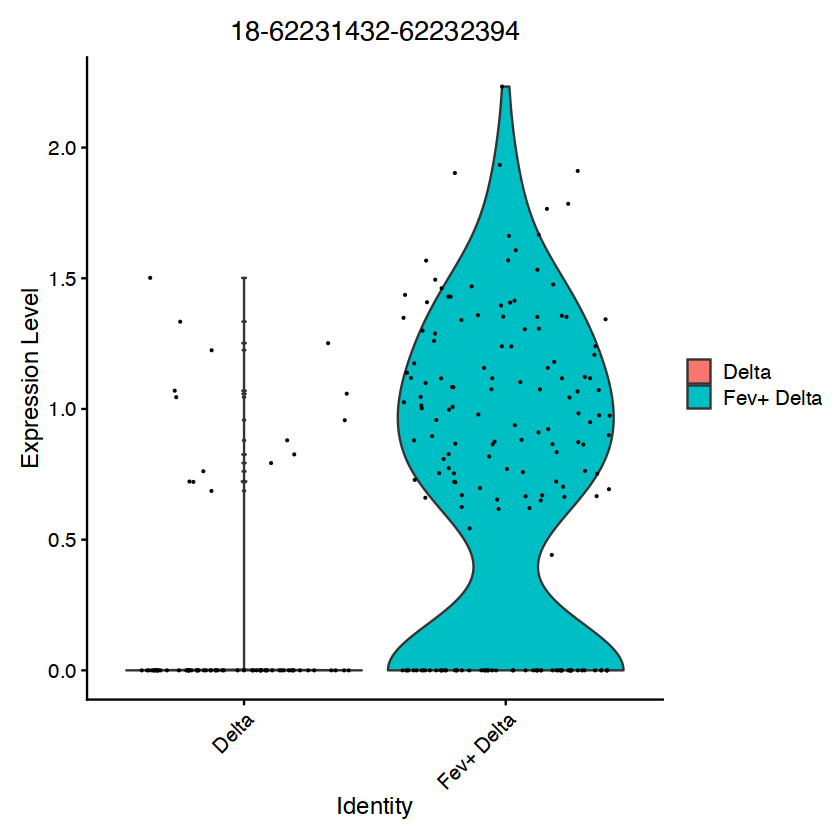

In [80]:
plot1

In [77]:
plot2 <- FeaturePlot(
  object = seurat,
  features = rownames(da_peaks)[1],
  pt.size = 0.1
)

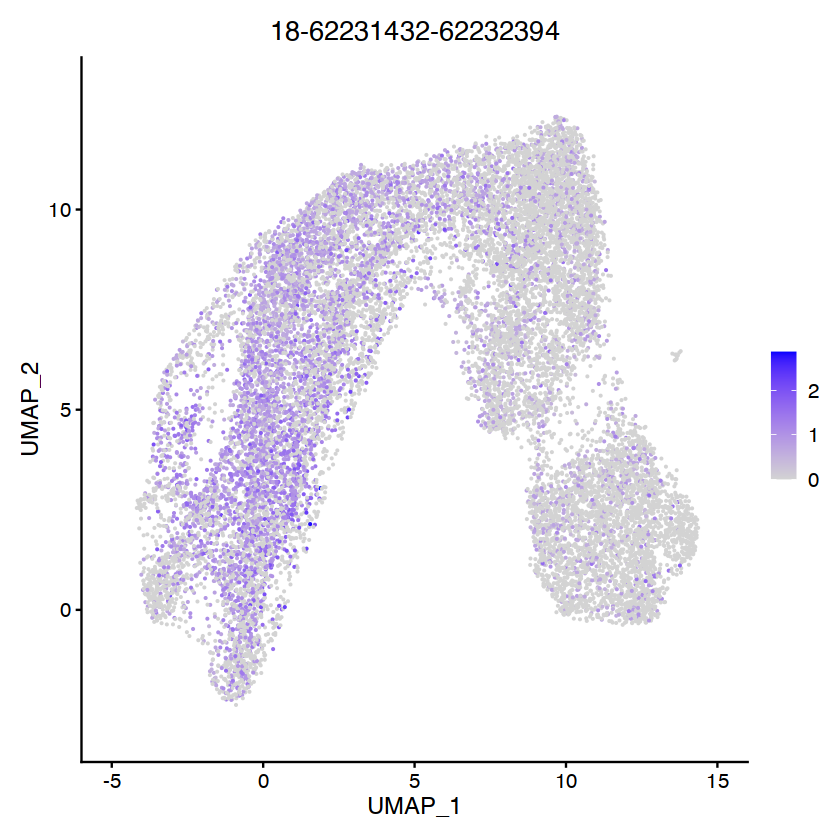

In [78]:
plot2

In [81]:
da_peaks <- FindMarkers(
  object = seurat,
  ident.1 = "Ngn3 high cycling",
  ident.2 = "Ngn3 high",
  min.pct = 0.05,
)

head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6-21997783-21998707,3.030765e-26,0.5362753,0.345,0.077,6.917994e-21
13-21780271-21781056,8.336112e-26,0.4158617,0.381,0.093,1.902793e-20
16-46804413-46805315,4.041315e-21,0.3522852,0.144,0.019,9.224666e-16
16-77466975-77467879,1.001115e-20,0.4233764,0.345,0.090,2.285134e-15
9-44337570-44338470,3.502009e-20,0.3569119,0.187,0.032,7.993652e-15
6-47367172-47368100,8.081209e-20,0.3606345,0.101,0.010,1.844609e-14


In [82]:
plot1 <- VlnPlot(
  object = seurat,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  idents = c("Ngn3 high cycling","Ngn3 high")
)

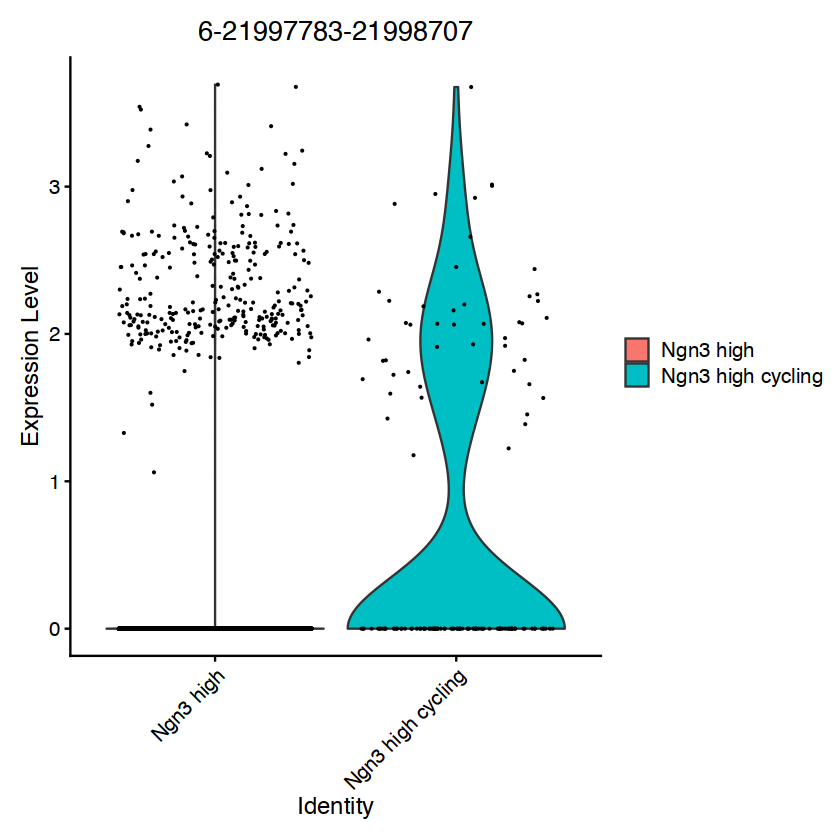

In [83]:
plot1

In [84]:
plot2 <- FeaturePlot(
  object = seurat,
  features = rownames(da_peaks)[1],
  pt.size = 0.1
)

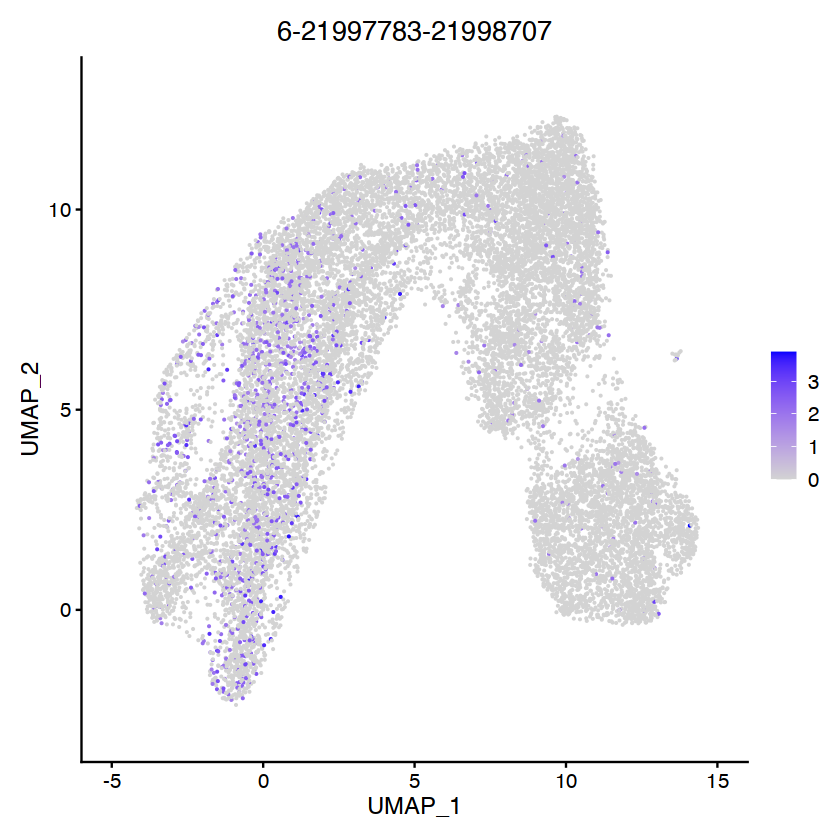

In [85]:
plot2

In [86]:
da_peaks <- FindMarkers(
  object = seurat,
  ident.1 = "Fev+",
  ident.2 = "Fev+ Beta",
  min.pct = 0.05,
)

head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8-66768192-66769106,3.410292e-59,-0.6621234,0.098,0.399,7.784300e-54
3-120238779-120239709,3.242849e-57,-0.6689379,0.054,0.322,7.402095e-52
5-147263756-147264690,2.287025e-45,-0.5176420,0.046,0.267,5.220341e-40
6-112525158-112526034,3.752650e-43,-0.5882424,0.037,0.241,8.565762e-38
12-96123946-96124879,5.297605e-41,-0.4712648,0.157,0.412,1.209226e-35
2-159884527-159885448,2.964184e-39,-0.4529809,0.280,0.541,6.766018e-34


In [87]:
plot1 <- VlnPlot(
  object = seurat,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  idents = c("Fev+","Fev+ Beta")
)

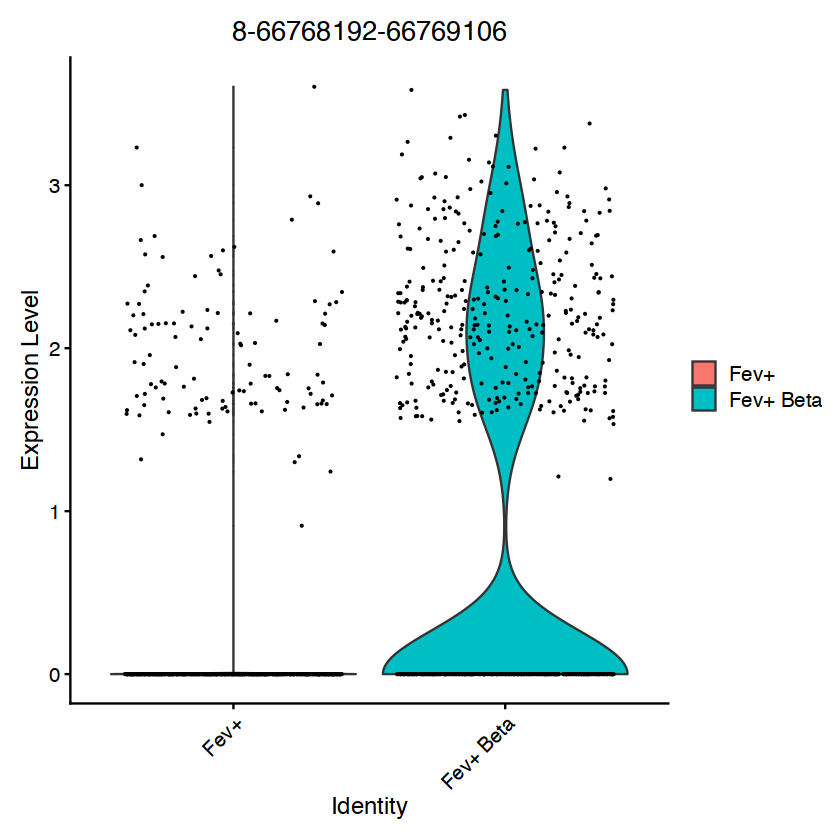

In [88]:
plot1

In [89]:
plot2 <- FeaturePlot(
  object = seurat,
  features = rownames(da_peaks)[1],
  pt.size = 0.1
)

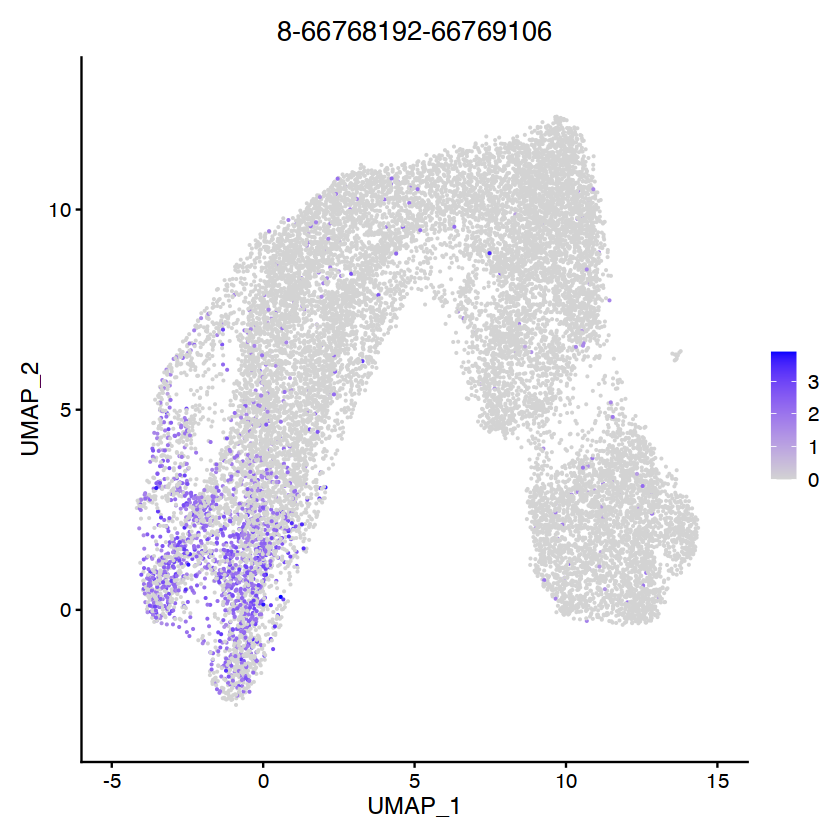

In [90]:
plot2

In [92]:
da_peaks <- FindMarkers(
  object = seurat,
  ident.1 = "Eps/Delta progenitors",
  ident.2 = "Ngn3 high",
  min.pct = 0.05,
)

head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10-64082077-64082994,4.487300e-75,0.8775452,0.338,0.040,1.024267e-69
18-83240115-83241017,5.666832e-49,0.3996767,0.147,0.010,1.293505e-43
19-40766903-40767844,1.657272e-45,0.5653392,0.152,0.012,3.782874e-40
2-135719090-135719994,4.003527e-44,0.5287424,0.132,0.009,9.138411e-39
8-85971048-85971921,4.203334e-44,0.4891446,0.152,0.013,9.594487e-39
6-42610841-42611651,6.209558e-42,0.6164592,0.176,0.019,1.417387e-36


In [93]:
plot1 <- VlnPlot(
  object = seurat,
  features = rownames(da_peaks)[1],
  pt.size = 0.1,
  idents = c("Fev+","Fev+ Beta")
)

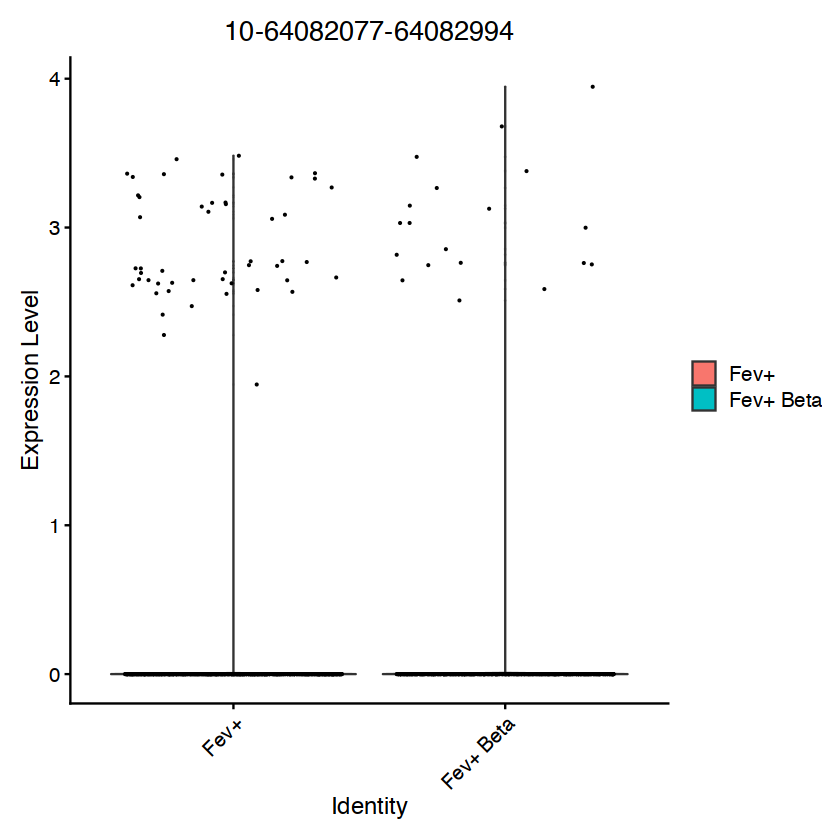

In [94]:
plot1

In [111]:
plot2 <- FeaturePlot(
  object = seurat,
  features = rownames(da_peaks)[9],
  pt.size = 0.1
)

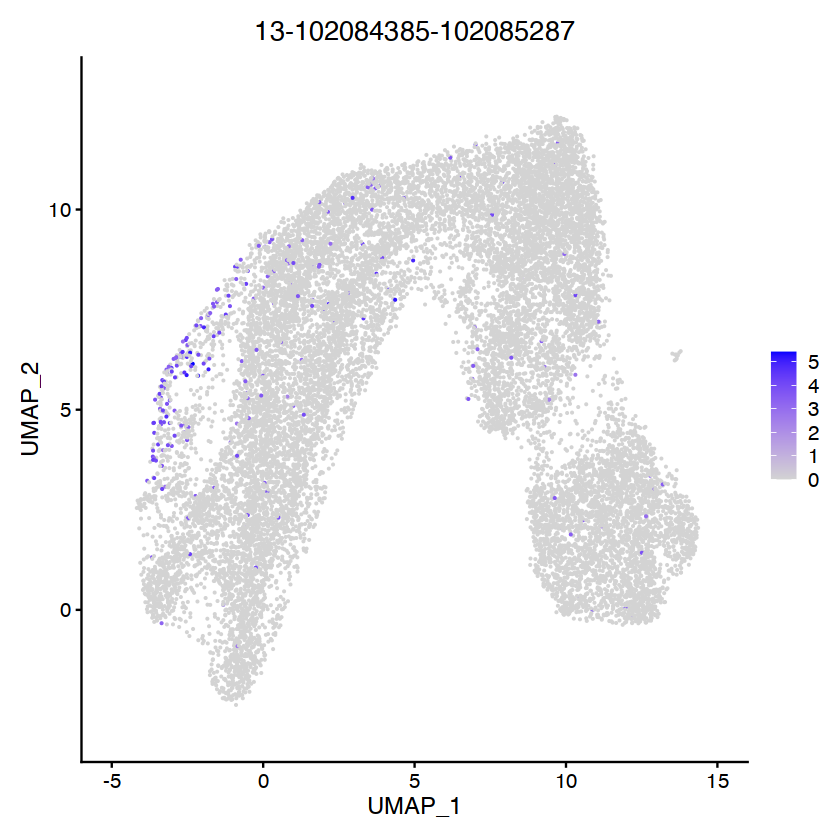

In [112]:
plot2

In [113]:
rownames(da_peaks)[9]

[1] "13-102084385-102085287"

In [122]:
da_peaks <- FindMarkers(
  object = seurat,
  ident.1 = "Delta",
  ident.2 = "Epsilon",
  min.pct = 0.05,
)

head(da_peaks)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5-88902818-88903785,4.137969e-15,0.9288666,0.286,0.012,9.445286e-10
1-62667635-62668544,1.447331e-11,0.8661050,0.273,0.028,3.303662e-06
6-33430997-33431906,2.313887e-11,0.8626888,0.338,0.057,5.281655e-06
13-72628379-72629201,6.625349e-10,-0.5391312,0.078,0.470,1.512295e-04
2-174097443-174098350,3.960846e-09,0.6456445,0.169,0.008,9.040987e-04
2-57342189-57343112,4.842811e-09,0.6741554,0.221,0.024,1.105415e-03


In [134]:
closest_genes <- ClosestFeature(seurat, regions = rownames(da_peaks)[1])

In [135]:
head(closest_genes)

,tx_id,gene_name,gene_id,gene_biotype,type,closest_region,query_region,distance
,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>
ENSMUST00000239214,ENSMUST00000239214,Slc4a4,ENSMUSG00000060961,protein_coding,gap,5-88887325-88934748,5-88902818-88903785,0


Warning message:
“Removed 81 rows containing missing values (geom_segment).”


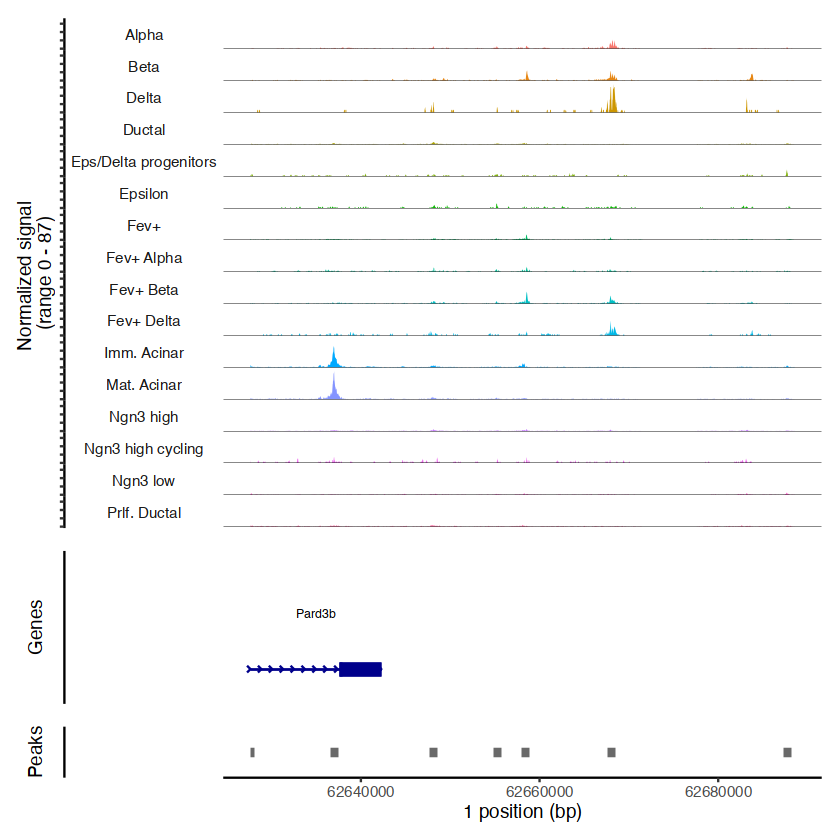

In [136]:
CoveragePlot(
  object = seurat,
  region = rownames(da_peaks)[2],
  extend.upstream = 40000,
  extend.downstream = 20000
)
